In [28]:
import SITSpinOneMFT as sit
import numpy as np 
from scipy import integrate as intg
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors as mclr


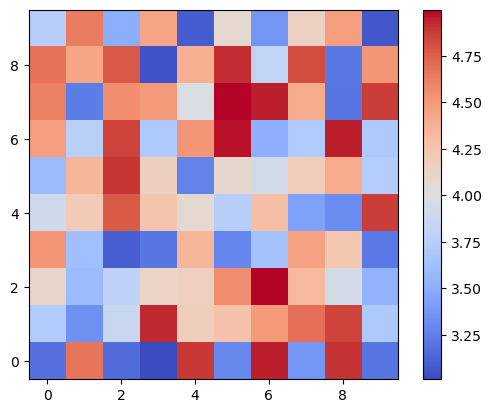

In [49]:
Lx = 10
Ly = 10
Ej = 1.
Ec = sit.rng.uniform(low=3.*Ej,high=5.*Ej,size=(Lx,Ly))

plt.imshow(Ec,origin='lower',cmap='coolwarm')
plt.colorbar()
plt.show()

In [69]:
nts = 250
times = np.linspace(0.,100.,nts)

In [70]:
flux = 0.3
tR = 1.

qf = lambda t: sit.ramsey_flux_quench(t,flux,tR)

In [71]:
wf_vs_t = sit.solve_eom_quench(Lx,Ly,Ec,Ej,times,qf)

In [72]:
m_vs_t = sit.magnetization(wf_vs_t)
c2_vs_t = sit.charge_squared(wf_vs_t)

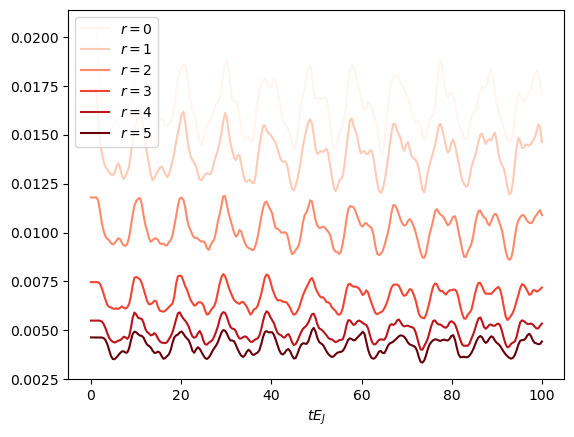

In [73]:
sites = [0,1,2,3,4,5]
clrs = cm.Reds(np.linspace(0.,1.,len(sites)))
for i in range(len(sites)):
    plt.plot(times,c2_vs_t[sites[i],0,:],label=r'$r=$'+str(sites[i]),color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.legend()
plt.show()

In [77]:
Loschmidt_echo = np.array([ np.prod(sit.overlap(wf_vs_t[...,0],wf_vs_t[...,t])) for t in range(len(times)) ])

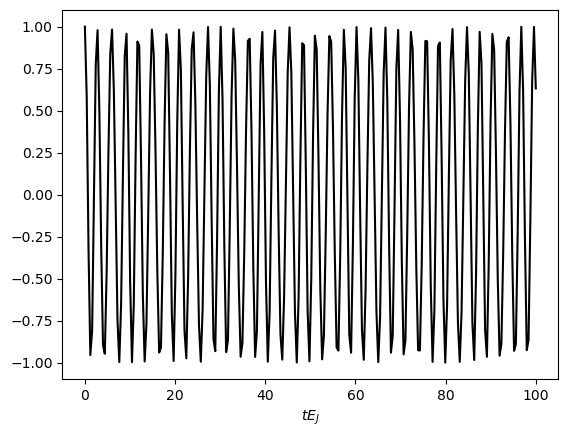

In [78]:
plt.plot(times,np.real(Loschmidt_echo),color='black')
plt.xlabel(r'$tE_J$')
plt.show()

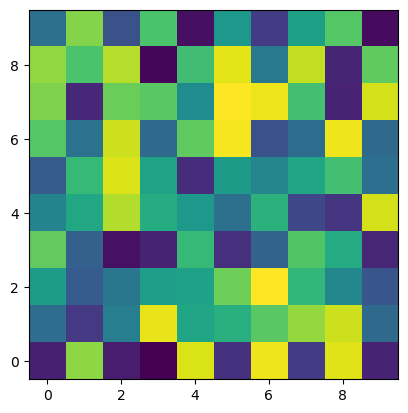

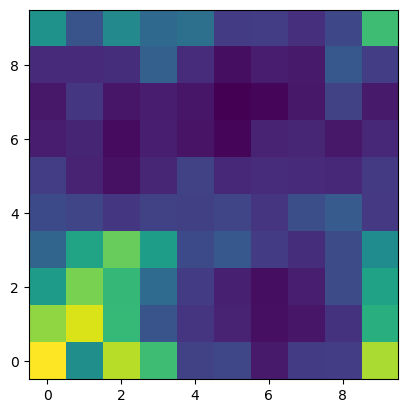

In [76]:
plt.imshow(Ec[:,:],origin='lower')
plt.show()
plt.imshow(c2_vs_t[:,:,0],origin='lower')
plt.show()
